$$
\newcommand{\ped}[1]{_{\mathrm{#1}}}
\newcommand{\ap}[1]{^{\mathrm{#1}}}
\newcommand{\nvector}[1]{\mathbf{#1}}
\newcommand{\nmatrix}[1]{\mathit{#1}}
\newcommand{\unitvector}[1]{\hat{\nvector{e}}_{#1}}
\newcommand{\volume}{\mathcal{V}}
\newcommand{\average}[1]{\overline{#1}}
\newcommand{\rate}[1]{\dot{#1}}
\newcommand{\flux}[1]{{#1}''}
\newcommand{\curl}[1]{\nabla\times {#1}}
\newcommand{\curlv}[1]{\curl{\nvector{#1}}}
\newcommand{\divergent}[1]{\nabla \cdot #1}
\newcommand{\divergentv}[1]{\divergent{\nvector{#1}}}
\newcommand{\divergentpar}[1]{\divergent{\left( #1 \right)}}
\newcommand{\gradient}[1]{\nabla {#1}}
\newcommand{\gradientpar}[1]{\gradient{\left( {#1} \right)}}
\newcommand{\laplacian}[1]{\nabla^2 #1}
\newcommand{\laplacianpar}[1]{\laplacian{\left( #1 \right)}}
\newcommand{\vectornorm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\diffp}[2]{\frac{\partial {#1}}{\partial {#2}}}
\newcommand{\diffps}[2]{\frac{\partial^2 {#1}}{\partial {#2}^2}}
\newcommand{\rvec}{\nvector{r}}
\newcommand{\nvh}{\nvector{H}}
\newcommand{\nvb}{\nvector{B}}
\newcommand{\nvrem}{\nvector{B}\ped{rem}}
\newcommand{\nvbrem}{\nvrem}
\newcommand{\nvm}{\nvector{M}}
\newcommand{\mur}{\mu\ped{r}}
\newcommand{\nvbremhat}{\hat{\nvector{B}}\ped{rem}}
\newcommand{\acoef}[2]{a_{{#1},\mathrm{#2}}}
\newcommand{\bcoef}[2]{b_{{#1},\mathrm{#2}}}
\newcommand{\Azexpr}[1]{A_{\mathrm{#1}\, z}}
\newcommand{\bremii}{B_{\mathrm{rem,II}}}
\newcommand{\bremiv}{B_{\mathrm{rem,IV}}}
\newcommand{\aIII}{\acoef{1}{III}}
\newcommand{\bIII}{\bcoef{1}{III}}
\newcommand{\nvbIII}{\nvector{B}\ped{III}}
\newcommand{\BIII}{B\ped{III}}
\newcommand{\diffd}[1]{\mathrm{d}\,{#1}}
$$

# TeslaMax Sample Calculations

Teslamax model:

<img src="figures/teslamax.png" width=500>

Tell the location of the TeslaMax Java class file:

In [23]:
from pathlib import Path
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import teslamax
from teslamax import TeslaMaxModel



mpl_params = {'text.usetex': True,
              'font.family': 'serif',
              'font.serif': 'Computer Modern',
              'text.latex.preamble': [r'\usepackage{engsymbols}',
                                      r'\usepackage{magref}',
                                      r'\usepackage{siunitx}']}
matplotlib.rcParams.update(mpl_params)


In [25]:
FIGSIZE_CM = 20
FIGSIZE_INCHES = FIGSIZE_CM / 2.54

FONTSIZE = 20

## Playground

In [7]:
os.chdir('C:\\Users\\fabiofortkamp\\code\\TeslaMax\\')

In [13]:
teslamax_playground = "teslamax-play"


In [14]:
os.getcwd()

'C:\\Users\\fabiofortkamp\\code\\TeslaMax'

### Magnetic Profile

In [26]:
# these are the parameters that are found to produce a near-instantaneous profile
param_dict = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.010,
                "R_e": 2,
                "n_IV": 3,
                "alpha_rem_IV_1": 15,
                "alpha_rem_IV_2": 45,
                "alpha_rem_IV_3": 135,
                "phi_S_IV": 45,
                "n_II": 3,
                "alpha_rem_II_1": 15,
                "alpha_rem_II_2": 30,
                "alpha_rem_II_3": 45,
                "phi_C_II": 15,
                "phi_S_II": 45,
                "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
              "linear_iron": 1,
              "mu_r_iron": 5e3,
             }


In [27]:
tmm = TeslaMaxModel(params=param_dict,
                   path=teslamax_playground)

In [28]:
tmm.run(verbose=True)

*******************************************
***COMSOL 5.2.1.229 progress output file***
*******************************************
Thu Feb 09 09:21:57 BRST 2017
COMSOL 5.2a (Build: 229) starting in batch mode
Running: C:\Users\fabiofortkamp\code\teslamax\java\TeslaMax.class
           Current Progress:   0 % - Circle 1
Memory: 379/380 576/577
           Current Progress:   8 % - Circle 2
Memory: 388/391 585/589
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 389/391 586/589
           Current Progress:   0 % - Circle 1
Memory: 390/391 586/589
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 394/398 589/593
           Current Progress:   0 % - Circle 1
Memory: 395/398 587/593
           Current Progress:   0 % - Circle 2
Memory: 396/398 588/593

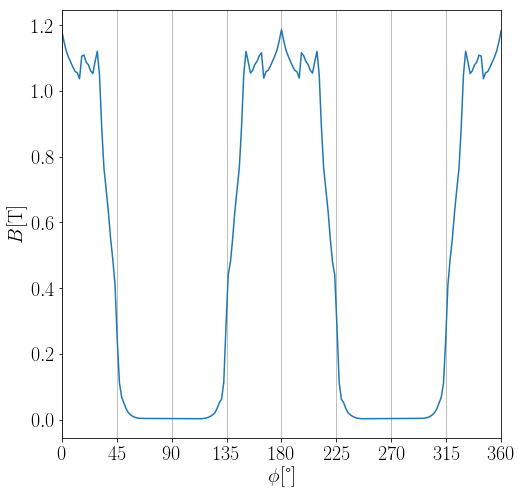

In [29]:
%matplotlib inline
plt.rc('font',size=FONTSIZE)

profile_fig = plt.figure(figsize=(FIGSIZE_INCHES,FIGSIZE_INCHES))
profile_axes = profile_fig.add_subplot(111)

phi_vector, B_vector = tmm.get_profile_data().T

profile_axes.plot(phi_vector,B_vector)
profile_axes.set_xlim(0,np.max(phi_vector))
profile_axes.set_xticks(np.linspace(0,np.max(phi_vector),9))
profile_axes.xaxis.grid(True)
profile_axes.set_xlabel(r'$\phi [\si{\degree}]$')
profile_axes.set_ylabel(r'$B [\si{\tesla}]$')


### Magnet profile - comparison between linear and non-linear iron regions

In [30]:
param_dict_linear_5000 = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.010,
                "R_e": 2,
                "n_IV": 3,
                "alpha_rem_IV_1": 15,
                "alpha_rem_IV_2": 45,
                "alpha_rem_IV_3": 135,
                "phi_S_IV": 45,
                "n_II": 3,
                "alpha_rem_II_1": 15,
                "alpha_rem_II_2": 30,
                "alpha_rem_II_3": 45,
                "phi_C_II": 15,
                "phi_S_II": 45,
                "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
              "linear_iron": 1,
              "mu_r_iron": 5e3,
             }

param_dict_non_linear = param_dict_linear_5000.copy()
param_dict_non_linear["linear_iron"] = 0

param_dict_linear_1000 = param_dict_linear_5000.copy()
param_dict_linear_1000["mu_r_iron"] = 1e3



In [31]:
tmm_linear_5000 = TeslaMaxModel(params=param_dict_linear_5000,
                               path=teslamax_playground)
tmm_linear_5000.run()

phi_vector_linear_5000, B_vector_linear_5000 = tmm_linear_5000.get_profile_data().T


In [32]:
tmm_linear_1000 = TeslaMaxModel(params=param_dict_linear_1000,
                               path=teslamax_playground)
tmm_linear_1000.run()

phi_vector_linear_1000, B_vector_linear_1000 = tmm_linear_1000.get_profile_data().T


In [33]:
tmm_non_linear = TeslaMaxModel(params=param_dict_non_linear,
                               path=teslamax_playground)
tmm_non_linear.run()

phi_vector_non_linear, B_vector_non_linear = tmm_non_linear.get_profile_data().T


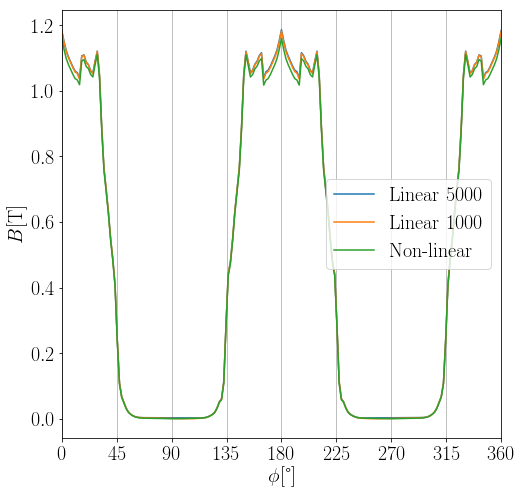

In [34]:
%matplotlib inline
plt.rc('font',size=FONTSIZE)

profile_fig = plt.figure(figsize=(FIGSIZE_INCHES,FIGSIZE_INCHES))
profile_axes = profile_fig.add_subplot(111)

profile_axes.plot(phi_vector_linear_5000,B_vector_linear_5000,label="Linear 5000")
profile_axes.plot(phi_vector_linear_1000,B_vector_linear_1000,label="Linear 1000")
profile_axes.plot(phi_vector_non_linear,B_vector_non_linear,label="Non-linear")

profile_axes.set_xlim(0,np.max(phi_vector))
profile_axes.set_xticks(np.linspace(0,np.max(phi_vector),9))
profile_axes.xaxis.grid(True)
profile_axes.set_xlabel(r'$\phi [\si{\degree}]$')
profile_axes.set_ylabel(r'$B [\si{\tesla}]$')
profile_axes.legend(loc='best')


### Magnet profile - comparison between iron and magnet core

In [42]:
param_dict_magnet = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.020,
                "R_e": 2,
                "n_IV": 3,
                "alpha_rem_IV_1": 15,
                "alpha_rem_IV_2": 45,
                "alpha_rem_IV_3": 75,
                "phi_S_IV": 45,
                "n_II": 2,
                "alpha_rem_II_1": -45,
                "alpha_rem_II_2": -45,
                "phi_C_II": 15,
                "phi_S_II": 45,
                 "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
                "linear_iron": 0
             }

param_dict_iron = param_dict_magnet.copy()
param_dict_iron["n_II"] = 0
param_dict_iron["phi_C_II"] = 0
param_dict_iron["phi_S_II"] = 0



In [43]:
tmm_magnet = TeslaMaxModel(params=param_dict_magnet,
                          path=teslamax_playground)
tmm_magnet.run(verbose=True)

*******************************************
***COMSOL 5.2.1.229 progress output file***
*******************************************
Thu Feb 09 09:32:46 BRST 2017
COMSOL 5.2a (Build: 229) starting in batch mode
Running: C:\Users\fabiofortkamp\code\teslamax\java\TeslaMax.class
           Current Progress:   0 % - Circle 1
Memory: 375/377 572/574
           Current Progress:   8 % - Circle 2
Memory: 367/385 565/584
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 370/385 566/584
           Current Progress:   0 % - Circle 1
Memory: 371/385 567/584
           Current Progress:   8 % - Circle 2
Memory: 371/385 568/584
-          Current Progress:  17 % - Difference 1
Memory: 372/385 568/584
---------  Current Progress:  93 % - Resolving domains
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 389/391 584/585
           Current Progress:   0 % - Circle 1
Memory: 392/392 586/586
           Current Pr

In [44]:
tmm_iron = TeslaMaxModel(params=param_dict_iron,
                          path=teslamax_playground)
tmm_iron.run()

In [46]:
phi_vector_magnet, B_vector_magnet = tmm_magnet.get_profile_data().T
phi_vector_iron, B_vector_iron = tmm_iron.get_profile_data().T

In [50]:
B_vector_iron - B_vector_iron

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

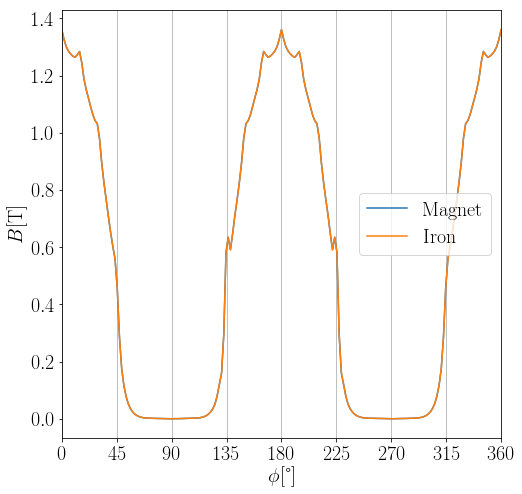

In [47]:
%matplotlib inline
plt.rc('font',size=FONTSIZE)

profile_fig = plt.figure(figsize=(FIGSIZE_INCHES,FIGSIZE_INCHES))
profile_axes = profile_fig.add_subplot(111)

profile_axes.plot(phi_vector_magnet,B_vector_magnet,label="Magnet")
profile_axes.plot(phi_vector_iron,B_vector_iron,label="Iron")
profile_axes.set_xlim(0,np.max(phi_vector))
profile_axes.set_xticks(np.linspace(0,np.max(phi_vector),9))
profile_axes.xaxis.grid(True)
profile_axes.set_xlabel(r'$\phi [\si{\degree}]$')
profile_axes.set_ylabel(r'$B [\si{\tesla}]$')
profile_axes.legend(loc='best')


### Influence of the external radius

In this code block, we run simulations for some values of $R\ped{o}$, $h\ped{gap}$ and $R\ped{s}$. The innermost radius is fixed as $R\ped{i} = 15 \mathrm{mm}$. The material properties are fixed. 

We consider two cases:



### Case 1: remanence from the analytical solution

In [ ]:
R_i = 15e-3

R_o_values = np.array([40e-3,50e-3,60e-3])

h_gap_values = np.array([20e-3,30e-3])

params_base = {"R_i": R_i,
                "h_fc": 0.020,
                "R_e": 2,
                "n_IV": 3,
                "phi_S_IV": 45,
                "B_rem_IV": 1.4,
                "mu_r_IV": 1.05,
               "n_II": 0, #iron core
               "phi_C_II": 0,
               "phi_S_II": 0,
               "linear_iron": 1,
               "mu_r_iron": 1e3,
              }

n_R_s_points = 10

R_s_min = 100e-3
R_s_max = 150e-3
R_s_vector = np.linspace(R_s_min,R_s_max,n_R_s_points)

i_sim = 0 #simulation index
teslamax_table = DataFrame()
for R_o in R_o_values:
    
    params_base["R_o"] = R_o

    for h_gap in h_gap_values:
        
        params_base["h_gap"] = h_gap
        
        B_h_vector = np.empty(n_R_s_points)
        B_l_vector = np.empty(n_R_s_points)
        
        i_R_s = 0 #innermost index to build the plot
        for R_s in R_s_vector:
            
            params_base["R_s"] = R_s
            
            # as a reference, we use the analytical model to determine
            # the direction of remanence
            
            # for the outer magnet, it can be shown that, if a point is at an
            # angular position \phi from the horizontal, then the remanence
            # is oriented with an angle 2\phi
            for k in range(0,params_base["n_IV"]):
                phi_segment_IV = (1.0/2 + k) * params_base["phi_S_IV"]/params_base["n_IV"]
                params_base["alpha_rem_IV_%d" %(k+1)] = 2*phi_segment_IV
            
            write_parameter_file_from_dict(params_base)
                        
            run_teslamax()
            
            results = read_main_results_file()
            
            B_high = results["B_high[T]"]
            B_h_vector[i_R_s] = B_high
            
            B_low = results["B_low[T]"]
            B_l_vector[i_R_s] = B_low
            
            parameters = get_comsol_parameters_series()
            
            simulation_row = DataFrame(pd.concat([parameters,results]).to_dict(),index=[i_sim,])
            simulation_row.index.name = "Case"
            simulation_row["n_IV"] = simulation_row["n_IV"].astype('int64')
            i_sim = i_sim + 1
            
            teslamax_table = pd.concat([teslamax_table,simulation_row])
            teslamax_table.to_csv(TESLAMAX_RESULTS_FILENAME,sep=' ')
            
            i_R_s = i_R_s+1

## Case 2: random direction of remanence

In [ ]:
360*np.random.random()

In [ ]:
R_i = 15e-3

R_o_values = np.array([70e-3,80e-3,90e-3])

h_gap_values = np.array([15e-3,25e-3,35e-3])

params_base = {"R_i": R_i,
                "h_fc": 0.020,
                "R_e": 2,
                "n_II": 3,
                "n_IV": 3,
                "phi_S_II": 45,
                "phi_S_IV": 45,
                "B_rem_II": 1.47, #Bakker N52
                "mu_r_II": 1.05,
                "H_c_II": 850e3,
                "B_rem_IV": 1.47,
                "mu_r_IV": 1.05,
                "H_c_IV": 850e3,
              }

n_R_s_points = 10

R_s_min = 140e-3
R_s_max = 200e-3
R_s_vector = np.linspace(R_s_min,R_s_max,n_R_s_points)

i_sim = 0 #simulation index
teslamax_table_random = DataFrame()
for R_o in R_o_values:
    
    params_base["R_o"] = R_o

    for h_gap in h_gap_values:
        
        params_base["h_gap"] = h_gap
        
        B_h_vector = np.empty(n_R_s_points)
        B_l_vector = np.empty(n_R_s_points)
        
        i_R_s = 0 #innermost index to build the plot
        for R_s in R_s_vector:
            
            params_base["R_s"] = R_s
            
            # in this analysis, we set a random direction of remanence
            
            # for the inner magnet, the remanence is always horizontal
            for j in range(0,params_base["n_II"]):
                params_base["alpha_rem_II_%d" %(j+1)] = 360*np.random.random()

            for k in range(0,params_base["n_IV"]):

                params_base["alpha_rem_IV_%d" %(k+1)] = 360*np.random.random()
            
            write_parameter_file_from_dict(params_base)
                        
            run_teslamax()
            
            results = read_main_results_file()
            
            B_high = results["B_high[T]"]
            B_h_vector[i_R_s] = B_high
            
            B_low = results["B_low[T]"]
            B_l_vector[i_R_s] = B_low
            
            parameters = get_comsol_parameters_series()
            
            simulation_row = DataFrame(pd.concat([parameters,results]).to_dict(),index=[i_sim,])
            simulation_row.index.name = "Case"
            simulation_row["n_II"] = simulation_row["n_II"].astype('int64')
            simulation_row["n_IV"] = simulation_row["n_IV"].astype('int64')
            i_sim = i_sim + 1
            
            teslamax_table_random = pd.concat([teslamax_table_random,simulation_row])
            teslamax_table_random.to_csv(TESLAMAX_RESULTS_RANDOM_FILENAME,sep=' ')
            
            i_R_s = i_R_s+1

### Process the results

If desired, load the table from a file, instead of (re-)running the above code block:

In [ ]:
teslamax_table = pd.read_table(TESLAMAX_RESULTS_FILENAME,sep=" ",index_col=0)
#teslamax_table_random = pd.read_table(TESLAMAX_RESULTS_RANDOM_FILENAME,sep=" ",index_col=0)

In [ ]:
teslamax_table

Our first filter is to select only values where the low magnetic value is smaller than a "critical value" of $0.1 \mathrm{T}$.

In [ ]:
teslamax_table_valid = teslamax_table[teslamax_table["B_low[T]"] < 0.1]
teslamax_table_valid

We will create one figure for each value of $R\ped{o}$, with one curve for each value of $h\ped{gap}$; the axes will represent $R\ped{s}$ and $B\ped{h}$.

In [ ]:
%matplotlib inline

plt.rc('font',size=FONTSIZE)

R_o_values = teslamax_table_valid["R_o[m]"].unique()

markers = ["ko","ks","kv"]

h_gap_values = teslamax_table_valid["h_gap[m]"].unique()

for R_o in R_o_values:

    table_R_o = teslamax_table_valid[teslamax_table_valid["R_o[m]"] == R_o]

    R_o_figure = plt.figure(figsize=(FIGSIZE_INCHES,FIGSIZE_INCHES))
    
    R_o_axes = R_o_figure.add_subplot(111)

    title_text = r"$R\ped{o} = \SI{" + "%.0f" %(1e3*R_o,) + r"}{\milli\meter}$"
    R_o_axes.set_title(title_text)

    R_o_axes.set_xlabel(r"$R\ped{s} [\si{\milli\meter}]$")
    R_o_axes.set_ylabel(r"$B\ped{h} [\si{\tesla}]$")
    R_o_axes.set_xlim((1e3*(R_s_min-10e-3),1e3*(R_s_max+10e-3)))

    i_h = 0
    for h_gap in h_gap_values:

        table_h_gap = table_R_o[table_R_o["h_gap[m]"] == h_gap]

        R_s_values = 1e3*table_h_gap["R_s[m]"]
        B_h_values = table_h_gap["B_high[T]"]

        legend_text = r"$h\ped{gap} = \SI{" + "%.0f" %(1e3*h_gap) + "}{\milli\meter}$"

        R_o_axes.plot(R_s_values,
                      B_h_values,
                      markers[i_h],
                      label=legend_text,
                     markersize=MARKERSIZE)
        i_h = i_h + 1

    R_o_axes.legend(loc="upper left",fontsize=FONTSIZE_SMALL)
    
    fig_path = "Bh_Ro_%.0f" %(1e3*R_o) + PLOT_EXTENSION
    R_o_figure.savefig(fig_path,dpi=DPI,bbox_inches='tight')
    


### Analyzing one particular case

It seems that, for all cases, at least one of the magnets is demagnetized. Surprinsigly, the problem seems to be on magnet IV:

In [ ]:
teslamax_table["-H_Brem_II_max[A/m]"] <= 1000e3

In [ ]:
teslamax_table["-H_Brem_IV_max[A/m]"] <= 1000e3

To investigate even further, we plot the relevant fields for magnet IV, for a case of this table:

In [ ]:
table_case = teslamax_table.iloc[0]
table_case

In [ ]:
run_teslamax_from_params(table_case,verbose=True)

In [ ]:
def normalize_vector(v):
    """
    Return the normalized (dimensionless) form of vector (or list of vectors) v"""
    
    # v could be a single vector or a list of vectors, so we handle different cases
    if v.ndim == 1:
        return v/np.linalg.norm(v)
    else:
        v_norm = np.linalg.norm(v,axis=1)
        v_norm_inv = np.reciprocal(v_norm).reshape(len(v),1)
        return np.multiply(v,v_norm_inv)

In [ ]:
magnet_II_data = read_comsol_data_file(H_II_FILENAME)
x_II, y_II, B_II_x, B_II_y, H_II_x, H_II_y, B_rem_II_x, B_rem_II_y = magnet_II_data.T

H_II = np.array([H_II_x,H_II_y]).T
B_II = np.array([B_II_x,B_II_y]).T
B_rem_II = np.array([B_rem_II_x,B_rem_II_y]).T
B_rem_hat_II = normalize_vector(B_rem_II)
B_rem_hat_II_x, B_rem_hat_II_y = B_rem_hat_II.T

# already using the sign notation for the quadrants
Psi_II = -(H_II_x * B_rem_hat_II_x + H_II_y * B_rem_hat_II_y) * (B_II_x * B_rem_hat_II_x + B_II_y * B_rem_hat_II_y)

magnet_IV_data = read_comsol_data_file(H_IV_FILENAME)
x_IV, y_IV, B_IV_x, B_IV_y, H_IV_x, H_IV_y, B_rem_IV_x, B_rem_IV_y = magnet_IV_data.T

H_IV = np.array([H_IV_x,H_IV_y]).T
B_IV = np.array([B_IV_x,B_IV_y]).T
B_rem_IV = np.array([B_rem_IV_x,B_rem_IV_y]).T
B_rem_hat_IV = normalize_vector(B_rem_IV)
B_rem_hat_IV_x, B_rem_hat_IV_y = B_rem_hat_IV.T

Psi_IV = -(H_IV_x * B_rem_hat_IV_x + H_IV_y * B_rem_hat_IV_y) * (B_IV_x * B_rem_hat_IV_x + B_IV_y * B_rem_hat_IV_y)


In [ ]:
def create_quater_circle_figure_template(r_lim,params):
    """
    Return (fig,axes) correspondent to a figure of the first quadrant, limited by r_lim. 
    Both magnets are also drawn.
    
    The size of the figure is controlled by FIGSIZE_INCHES"""
    
    fig = plt.figure(figsize=(FIGSIZE_INCHES,FIGSIZE_INCHES))
    axes = fig.add_subplot(111,aspect='equal')
    
    axes.set_ylim(0,1e3*r_lim)
    axes.set_xlim(0,1e3*r_lim)

    axes.set_ylabel(r'$r\ [\si{\mm}$]')
    axes.set_xlabel(r'$r\ [\si{\mm}$]')
    
    R_o = params['R_o[m]']
    R_i = params['R_i[m]']
    R_s = params['R_s[m]']
    R_g = params['R_g[m]']
    
    magnet_II_outer=plt.Circle((0,0),1e3*R_o,color='k',fill=False)
    magnet_II_inner=plt.Circle((0,0),1e3*R_i,color='k',fill=False)
    axes.add_artist(magnet_II_outer)
    axes.add_artist(magnet_II_inner)

    magnet_IV_outer=plt.Circle((0,0),1e3*R_s,color='k',fill=False)
    magnet_IV_inner=plt.Circle((0,0),1e3*R_g,color='k',fill=False)
    axes.add_artist(magnet_IV_outer)
    axes.add_artist(magnet_IV_inner)
    
    return fig, axes

In [84]:
def generate_sector_mesh_points(R1,R2,phi1,phi2):
    """
    Return a list of points [X,Y] uniformily distributed in a circle between radii R1 and R2
    and angular positions phi1 and phi2
    
    The number of points is controlled by N_POINTS_PER_AXIS.
    """
    
    phi_min = phi1
    phi_max = phi2
    
    phi_vector = np.linspace(phi_min,phi_max,N_POINTS_PER_AXIS)
    
    r_vector = np.linspace(R1,R2,N_POINTS_PER_AXIS)
    
    phi_grid, r_grid = np.meshgrid(phi_vector,r_vector)
    
    X_vector = (r_grid*np.cos(phi_grid)).flatten()
    Y_vector = (r_grid*np.sin(phi_grid)).flatten()
    
    return np.array([X_vector,Y_vector]).T


    

In [ ]:
from matplotlib.patches import Wedge

In [ ]:
def create_magnet_IV_figure_template(params):
    """
    Return (fig,axes) correspondent to a figure of the first quadrant of magnet IV. 
    
    
    The size of the figure is controlled by FIGSIZE_INCHES"""
    
    fig = plt.figure(figsize=(FIGSIZE_INCHES,FIGSIZE_INCHES))
    axes = fig.add_subplot(111,aspect='equal')
    
    R_o = params['R_o[m]']
    R_i = params['R_i[m]']
    R_s = params['R_s[m]']
    R_g = params['R_g[m]']
    R_c = params['R_c[m]']
    r_lim = R_c
    
    axes.set_ylim(0,1e3*r_lim)
    axes.set_xlim(0,1e3*r_lim)

    axes.set_ylabel(r'$r\ [\si{\mm}$]')
    axes.set_xlabel(r'$r\ [\si{\mm}$]')
    
    width_IV = R_s - R_g
    n_IV = int(params['n_IV'])
    delta_phi_S_IV = params['delta_phi_S_IV[deg]']
    for i in range(0,n_IV):
        theta_0 = i*delta_phi_S_IV
        theta_1 = (i+1)*delta_phi_S_IV
        magnet_segment = Wedge((0,0),1e3*R_s,theta_0,theta_1,1e3*width_IV,color='k',fill=False)
        axes.add_artist(magnet_segment)
        
    return fig, axes

def create_magnets_figure_template(params):
    """
    Return (fig,axes) correspondent to a figure of the first quadrant of both magnets. 
    
    
    The size of the figure is controlled by FIGSIZE_INCHES"""
    
    fig = plt.figure(figsize=(FIGSIZE_INCHES,FIGSIZE_INCHES))
    axes = fig.add_subplot(111,aspect='equal')
    
    R_o = params['R_o[m]']
    R_i = params['R_i[m]']
    R_s = params['R_s[m]']
    R_g = params['R_g[m]']
    R_c = params['R_c[m]']
    r_lim = R_c
    
    axes.set_ylim(0,1e3*r_lim)
    axes.set_xlim(0,1e3*r_lim)

    axes.set_ylabel(r'$r\ [\si{\mm}$]')
    axes.set_xlabel(r'$r\ [\si{\mm}$]')
    
    width_II = R_o - R_i
    n_II = int(params['n_II'])
    delta_phi_S_II = params['delta_phi_S_II[deg]']
    for i in range(0,n_II):
        theta_0 = i*delta_phi_S_II
        theta_1 = (i+1)*delta_phi_S_II
        magnet_segment = Wedge((0,0),1e3*R_o,theta_0,theta_1,1e3*width_II,color='k',fill=False)
        axes.add_artist(magnet_segment)
        
    width_IV = R_s - R_g
    n_IV = int(params['n_IV'])
    delta_phi_S_IV = params['delta_phi_S_IV[deg]']
    for j in range(0,n_IV):
        theta_0 = j*delta_phi_S_IV
        theta_1 = (j+1)*delta_phi_S_IV
        magnet_segment = Wedge((0,0),1e3*R_s,theta_0,theta_1,1e3*width_IV,color='k',fill=False)
        axes.add_artist(magnet_segment)
        
    return fig, axes

In [ ]:
from scipy.constants import mu_0

In [ ]:
%matplotlib inline

case_series = get_comsol_parameters_series()
r_lim = case_series['R_c[m]']
Hc_fig, Hc_axes = create_magnet_IV_figure_template(case_series)

arrow_scale = 3.0
arrow_width = 0.03
head_axis_length = 3
head_length = 3

n_points = 30
interval = int(len(x_IV)/n_points)
B_rem_IV_vector_field = Hc_axes.quiver(1e3*x_IV[0:-1:interval],
                                      1e3*y_IV[0:-1:interval],
                                      B_rem_IV_x[0:-1:interval],
                                      B_rem_IV_y[0:-1:interval],
                                      units='inches',
                                      pivot='middle',
                                      headlength=head_length,
                                      headaxislength=head_axis_length,
                                      scale_units='inches',
                                      scale=arrow_scale,
                                      width=arrow_width)
H_scale = arrow_scale


H_IV_vector_field = Hc_axes.quiver(1e3*x_IV[0:-1:interval],
                                  1e3*y_IV[0:-1:interval],
                                  mu_0*H_IV_x[0:-1:interval],
                                  mu_0*H_IV_y[0:-1:interval],
                                  units='inches',
                                  pivot='middle',
                                  headlength=head_length,
                                  headaxislength=head_axis_length,
                                  scale_units='inches',
                                  scale=H_scale,
                                  width=arrow_width,
                                  color='r')
if SAVE_FIG_Q: save_and_close_figure(Hc_fig, "Hc")

Plot the energy density:

In [ ]:
%matplotlib inline

plt.rc('font',size=FONTSIZE)

R_o = table_case['R_o[m]']
R_i = table_case['R_i[m]']
R_s = table_case['R_s[m]']
R_g = table_case['R_g[m]']


r_II_min = 1.001*R_i
r_II_max = 0.999*R_o

r_IV_min = 1.001*R_g
r_IV_max = 0.999*R_s

phi_II_min = 0.0
phi_II_max = np.deg2rad(table_case['phi_S_II[deg]'])

phi_IV_min = 0.0
phi_IV_max = np.deg2rad(table_case['phi_S_IV[deg]'])

# -----
# GRID INITIALIZATION

positions_II = generate_sector_mesh_points(r_II_min,r_II_max,phi_II_min,phi_II_max)
positions_IV = generate_sector_mesh_points(r_IV_min,r_IV_max,phi_IV_min,phi_IV_max)

X_II_vector, Y_II_vector = 1e3*positions_II.T
X_IV_vector, Y_IV_vector = 1e3*positions_IV.T

points_II_to_evaluate = np.array([X_II_vector,Y_II_vector]).T
points_IV_to_evaluate = np.array([X_IV_vector,Y_IV_vector]).T

# loading COMSOL data
points_II_comsol = 1e3*np.array([x_II,y_II]).T
points_IV_comsol = 1e3*np.array([x_IV,y_IV]).T

Psi_II_comsol = griddata(points_II_comsol,Psi_II,points_II_to_evaluate,method='cubic')
Psi_IV_comsol = griddata(points_IV_comsol,Psi_IV,points_IV_to_evaluate,method='cubic')

Psi_II_masked = ma.masked_less(Psi_II_comsol,0.0)
Psi_IV_masked = ma.masked_less(Psi_IV_comsol,0.0)

cmap = matplotlib.cm.jet
cmap.set_bad('w')

Psi_concat = np.concatenate((Psi_II_comsol,Psi_IV_comsol))
Psi_min = 1e-3*np.min(Psi_concat)
Psi_max = 1e-3*np.max(Psi_concat)
   

# create the axes that represent this domain
Psi_fig, Psi_axes = create_magnets_figure_template(table_case)

# plot the color plot

#pcolormesh deals with 2D arrays, so we reshape our vectors
number_of_points_per_axes = int(math.sqrt(len(X_II_vector)))
mesh_shape = ( number_of_points_per_axes, number_of_points_per_axes)

Psi_II_mesh = Psi_axes.pcolormesh(X_II_vector.reshape(mesh_shape),
                                  Y_II_vector.reshape(mesh_shape),
                                  1e-3*Psi_II_masked.reshape(mesh_shape),
                                  vmin=0,
                                  vmax=Psi_max,
                                 cmap=cmap)

number_of_points_per_axes = int(math.sqrt(len(X_IV_vector)))
mesh_shape = ( number_of_points_per_axes, number_of_points_per_axes)

Psi_IV_mesh = Psi_axes.pcolormesh(X_IV_vector.reshape(mesh_shape),
                                  Y_IV_vector.reshape(mesh_shape),
                                  1e-3*Psi_IV_masked.reshape(mesh_shape),
                                  vmin=0,
                                  vmax=Psi_max,
                                 cmap=cmap)

#annotate the plot
Psi_colorbar = Psi_fig.colorbar(Psi_II_mesh,orientation='horizontal')
Psi_colorbar.set_label(r'$\Psi\ [\si{\kilo\joule\per\meter^3}]$')

if SAVE_FIG_Q: save_and_close_figure(Psi_fig, "Psi")


## Visualizing the distribution of coercivity

In [ ]:
coerc_data = teslamax_table_valid[["-H_Brem_II_max[A/m]","-H_Brem_IV_max[A/m]"]]
print(coerc_data)

In [ ]:
# values of coercivity for Bakker classes with B_rem > 1.4

bakker_coerc_data = 1e3*np.array([955,
                                 875,
                                 1114,
                                 1080,
                                 1353,
                                 ])

We want to visualize all the values of the maximum reverse magnetic field, and compare with Bakker data:

In [ ]:
%matplotlib inline

plt.rc('font',size=FONTSIZE)

coerc_hist_fig = plt.figure(figsize=(FIGSIZE_INCHES,FIGSIZE_INCHES))
coerc_hist_axes = coerc_hist_fig.add_subplot(111)

coerc_hist_axes.hist([1e-3*coerc_data.values.T[0],
                      1e-3*coerc_data.values.T[1],
                      1e-3*bakker_coerc_data.T],
                    label=["Magnet II","Magnet IV","Bakker Data"])
coerc_hist_axes.set_title(r'$-\nvh\cdot\nvbremhat[\si{\kilo\ampere\per\meter}]$')
coerc_hist_axes.legend()

if SAVE_FIG_Q: save_and_close_figure(coerc_hist_fig, "coercivity_histogram")

We can see that there are a range of parameters that produce values of reverse magnetic field smaller than some NdFeB classes. In other words, it should be possible to select a magnetic material with a high enough value of intrinsic coercivity.

## Calculating functional

A prototype class to help organize all the data:

In [34]:
class TeslaMaxModel():
    """
    Class representing the TeslaMax model.
    
    To create an instance of the class, provide a dictionary with all parameters
    and a path where to store the generated text files:
    
    >>> tmm = TeslaMaxModel({"R_o": 15e-3, "B_rem_II": 1.4, ...}.
                            "teslamax-results")
    
    If the path already exists, it will be cleaned up to avoid confusion between different simulations. 
    If you want to preserve the data in 'path', set the argument 'clean' to False in the constructor
    
    """
    
    def __init__(self,params,path,clean=True):
        self.params = params
        
        self.path = Path(path)
        if (self.path.exists() ) and (self.path.is_dir()) and clean:
            shutil.rmtree(str(self.path))
        
        self.path.mkdir(exist_ok=True)
        
        self.profile_data = np.empty(2)
        
                
    def run(self,verbose=False):
        """
        Change the current directory temporarily to the object's path
        and run the TeslaMax program in it.
        
        Also populates the appropriate fields with results from TeslaMax
        """
        
        cwd = os.getcwd()
        os.chdir(str(self.path))
        run_teslamax_from_params(self.params,verbose)
        os.chdir(cwd)
        
        self.profile_data = self.get_profile_data()
        self.fB_profile = interp1d(self.profile_data[:,0],self.profile_data[:,1],kind='linear')
        
    def get_B_III_data(self):
        """
        Return an array [x, y, Bx, By] for the air gap region
        """
        
        B_III_file_path = self.path / B_III_FILENAME
        B_III_full_data = read_comsol_data_file(str(B_III_file_path))
        
        B_III_data = B_III_full_data[:,:4]
        return B_III_data
    
    def calculate_B_III_from_position(self,point_cartesian):
        """
        Return B_III(x,y), where 'point_cartesian' = [x,y]
        """
        
        B_III_data = self.get_B_III_data()
        
        return griddata(B_III_data[:,:2],
                       B_III_data[:,2:4],
                       point_cartesian)
        
        
    def get_profile_data(self):
        """
        Return an array of the magnetic profile data, where the first column
        is the angle in degrees [0,360] and the second is the average magnetic
        flux density in tesla
        """
        
        profile_file_path = self.path / MAGNETIC_PROFILE_FILENAME
        profile_data = np.loadtxt(str(profile_file_path),
                         skiprows=1)
        
        return profile_data
    
    def calculate_B_profile(self,theta):
        """
        Return average magnetic flux density at angular position 'theta' (as an array with the same length).
        """
        
        return self.fB_profile(theta)
    
 
        
        
    
    
        
        
        
    

In [35]:
def expand_parameters_from_remanence_array(alpha_B_rem, params):
    """
    Return a new parameters dict with the remanence angles from 'alpha_B_rem' and other parameters from 'params'.
    The length of this array must equal to the sum of the number of segments in both cylinders. 
    The first n_II elements refer to the inner magnet, and the remaining elements to the outer magnet.
    """
    
    params_expanded = params.copy()
    
    n_II = params["n_II"]
    for i in range(0,n_II):
        params_expanded["alpha_rem_II_%d" %(i+1,)] = alpha_B_rem[i]
        
    n_IV = params["n_IV"]
    for j in range(0,n_IV):
        k =  j + n_II #the first n_II elements refer to magnet II
        params_expanded["alpha_rem_IV_%d" %(j+1,)] = alpha_B_rem[k]
        
    return params_expanded
    

In [36]:
def calculate_functional_from_remanence_array(alpha_B_rem, params):
    """
    Returns the (scalar) objective functional  for the TeslaMax optimization.
    The optimization variables are the remanence angles for the magnet segments, 
    specified in the array 'alpha_B_rem' (the first n_II elements refer to the inner magnet, and
    the remaining n_IV elements refer to the outer one).
    The other parameters are included in the dictionary 'params'.
    
    All simulation files are placed in a directory 'teslamax-optimization' in the current directory
    """
    
    
    path_functional = "teslamax-optimization"

    param_dict = expand_parameters_from_remanence_array(alpha_B_rem, params)
    
    teslamax_model = TeslaMaxModel(param_dict,path_functional)
    teslamax_model.run(verbose=False)
    
    return -1*calculate_average_high_field(teslamax_model.get_profile_data())
    

In [66]:
def calculate_derivative_functional_to_remanence(i,alpha_B_rem,params):
    """
    Return the derivative of the objective functional with respect to the 'i'-th element of the
    remanence angle array 'alpha_B_rem' (where the first n_II elements refer to the inner magnet, 
    and the remaining n_IV to the outer one).
    Other parameters are taken from 'params'
    """
    
    delta_alpha = 1e-6

    n_II = params['n_II']
    n_IV = params['n_IV']
    
    F_II_x = np.empty(n_II)
    F_II_y = np.empty(n_II)
    
    F_IV_x = np.empty(n_IV)
    F_IV_y = np.empty(n_IV)
    
    R_o = params["R_o"]
    R_g = params["R_o"] + params["h_gap"]
    points_air_gap = generate_sector_mesh_points(R_o,R_g,0.0,np.pi)
    
    for i in range(0,n_II):
        F_II_x = calculate_B_III_from_single_block(point=points_air_gap, 
                                                   segment=i+1, 
                                                   quadrant='1Q', 
                                                   magnet='II', 
                                                   magnitude=params["B_rem_II_%d_1Q" %(i+1)], 
                                                    angle=0.0, 
                                                    params=params)
        
        
        F_II_x[i] = F_II_x_1Q + F_II_x_2Q
        
        F_II_y_1Q = calculate_B_III_from_single_block(point=points_air_gap, 
                                                   segment=i+1, 
                                                   quadrant='1Q', 
                                                   magnet='II', 
                                                   magnitude=params["B_rem_II_%d_1Q" %(i+1)], 
                                                    angle=90.0, 
                                                    params=params)
        
        F_II_y_2Q = calculate_B_III_from_single_block(point=points_air_gap, 
                                                   segment=i+1, 
                                                   quadrant='2Q', 
                                                   magnet='II', 
                                                   magnitude=params["B_rem_II_%d_2Q" %(i+1)], 
                                                    angle=90.0, 
                                                    params=params)
        
        F_II_y[i] = F_II_y_1Q + F_II_y_2Q
        
        
    
    
    return d_functional

In [39]:
def calculate_B_III_from_single_block(point, segment, magnet, magnitude, angle, params):
    """
    Return B_III(point) when 'segment' (1, 2, 3, ...)  of 'magnet' (either 'II' or 'IV') 
    has a remanence of 'magnitude' and 'angle', and all other segments have null remanence. 
    
    Other parameters are taken from 'params'.
    """
    
    if magnet == 'II':
        n = params['n_II']
    elif magnet == 'IV':
        n = params['n_IV']
    
    # first nullify all remanences
    for m in ['II', 'IV']:
            
            for s in range(0,n):
                
                params["B_rem_%s_%d" %(m,s+1)] = 0.0
                
    # set the desired elements
    params["B_rem_%s_%d" %(magnet,segment)] = magnitude
    params["alpha_rem_%s_%d" %(magnet,segment)] = angle
    
    tmm = TeslaMaxModel(params,'teslamax-play-functional')
    tmm.run(verbose=False)
    return tmm.calculate_B_III_from_position(point)
    

In [43]:
os.chdir('C:\\Users\\fabiofortkamp\\code\\TeslaMax\\')

In [44]:
params_optimization = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.010,
                "R_e": 2,
                "n_IV": 3,
                "alpha_rem_IV_1": 15,
                "alpha_rem_IV_2": 45,
                "alpha_rem_IV_3": 135,
                "phi_S_IV": 45,
                "n_II": 3,
                "alpha_rem_II_1": 15,
                "alpha_rem_II_2": 30,
                "alpha_rem_II_3": 45,
                "phi_C_II": 15,
                "phi_S_II": 45,
                "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
              "linear_iron": 1,
              "mu_r_iron": 5e3,
             }

In [45]:
alpha_B_rem_0 = np.array([15,45,135,14,30,45])
calculate_functional_from_remanence_array(alpha_B_rem_0,params_optimization)

-0.82751792222222187

In [73]:
# basic and non-optimized implementation of gradient descent
i_segment = 0
n_it = 10

gamma = -1e-1

alpha_B_rem_0 = np.array([0,0,0,0,0,0])

alpha_B_rem = alpha_B_rem_0.copy()
for j in range(0,n_it):
    dS = calculate_derivative_functional_to_remanence(i_segment,alpha_B_rem,params_optimization)
    alpha_B_rem[i_segment] = alpha_B_rem[i_segment] + gamma * dS
    print(alpha_B_rem[i_segment])
    

-273
-317
-144
-121
-96
-195
-180
-165
-152
-102


In [46]:
calculate_functional_from_remanence_array(alpha_B_rem_0,params_optimization)

-0.82680030666666626

In [47]:
calculate_B_III_from_single_block([[0.080,0],[0.080,0.01]], segment=1,  magnet='II', magnitude=1.4, angle=0, params=params_optimization)

array([[  2.64779766e-02,  -2.98231642e-05],
       [  3.17854040e-02,  -9.35320997e-03]])